# [#30DaysOfDataViz](http://www.30daysofdataviz.com/) - Day 5 - Stylized Dark Mode Scatter Plot - Zillow Data

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [2]:
dfl = pd.read_csv('https://files.zillowstatic.com/research/public_v2/mlp/Metro_mlp_uc_sfrcondo_raw_month.csv')
dfs = pd.read_csv('https://files.zillowstatic.com/research/public_v2/median_sale_price/Metro_median_sale_price_uc_SFRCondo_raw_month.csv')

In [3]:
city_list = ['Los Angeles-Long Beach-Anaheim, CA', 'Jacksonville, FL', 'San Francisco, CA', 'Nashville, TN', 'New York, NY']

dfl = dfl[dfl['RegionName'].isin(city_list)]
dfs = dfs[dfs['RegionName'].isin(city_list)]

In [4]:
dfl.drop(['RegionID', 'SizeRank', 'RegionType', 'StateName'], axis=1, inplace=True)
dfs.drop(['RegionID', 'SizeRank', 'RegionType', 'StateName'], axis=1, inplace=True)

In [5]:
dfl = dfl.melt(id_vars=['RegionName'],
         value_vars=dfl.columns[1:-1],
         var_name='date',
         value_name='price')

dfs = dfs.melt(id_vars=['RegionName'],
         value_vars=dfs.columns[1:-1],
         var_name='date',
         value_name='price')

In [6]:
df = pd.merge(dfl, dfs, on=['RegionName', 'date'], suffixes=('_list', '_sale'))

df['date'] = pd.to_datetime(df['date'])
min_date = df['date'].min()
max_date = df['date'].max()

In [7]:
dfmin = df[df['date']==min_date]
dfmax = df[df['date']==max_date]

In [20]:
dfmin.head()

,RegionName,date,price_list,price_sale
0,"New York, NY",2017-11-30,524900.0,400000.0
1,"Los Angeles-Long Beach-Anaheim, CA",2017-11-30,795000.0,620000.0
2,"San Francisco, CA",2017-11-30,825000.0,787000.0
3,"Nashville, TN",2017-11-30,374900.0,265000.0
4,"Jacksonville, FL",2017-11-30,288008.0,226995.0


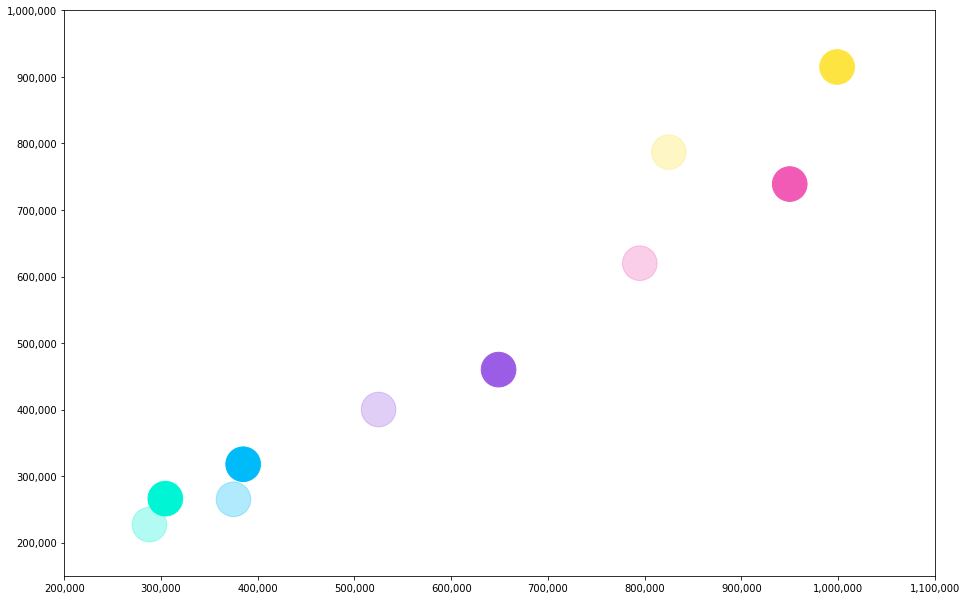

In [22]:
colors = {"New York, NY": "#9b5de5",
          "Los Angeles-Long Beach-Anaheim, CA": "#f15bb5",
          "San Francisco, CA": "#fee440",
          "Nashville, TN": "#00bbf9",
          "Jacksonville, FL": "#00F5D4"}

# Plot a sine and cosine curve
fig, ax = plt.subplots(figsize=(12*1.3,8*1.3))

dfa = pd.merge(dfmin[['RegionName', 'price_list', 'price_sale']],
         dfmax[['RegionName', 'price_list', 'price_sale']],
         on='RegionName',
         suffixes=['_min', '_max'])

arrow_conserve = .1
x_conserv = df['price_list'].max() - df['price_list'].min()
y_conserv = df['price_sale'].max() - df['price_sale'].min()

# #add arrows to plot
# for i, row in dfa.iterrows():
#     delta_list = (row['price_list_max'] - row['price_list_min'])
#     delta_sale = (row['price_sale_max'] - row['price_sale_min'])
    
#     ax.text(x=row['price_list_min'] + (delta_list * .40),
#              y=row['price_sale_min'] + (delta_sale * .5), 
#              s=row['RegionName'],
#              horizontalalignment = 'right')
    
#     ax.arrow(x  = row['price_list_min'] + (delta_list * arrow_conserve),  
#               y  = row['price_sale_min'] + (delta_sale * arrow_conserve),                  
#               dx = delta_list * (1 -  (2*arrow_conserve)),   
#               dy = delta_sale * (1 -  (2*arrow_conserve)), 
#               head_width = 10000,
#               head_length = 20000,
#               width=5000,
#              length_includes_head=True)

ax.scatter(x=dfmin['price_list'], y=dfmin['price_sale'], s=1200, c=colors.values(), alpha=.3)
ax.scatter(x=dfmax['price_list'], y=dfmax['price_sale'], s=1200, c=colors.values())
ax.set_xlim(200000,1100000)
ax.set_ylim(150000,1000000)

ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.savefig('data/Day5DarkModeScatter.png', transparent=True)